## Contexto

El cáncer de mama es una de las principales causas de mortalidad en mujeres en todo el mundo. Su diagnóstico precoz es clave para mejorar las tasas de supervivencia.

Este conjunto de datos contiene información clínica derivada de biopsias de tumores de mama, y permite desarrollar modelos de aprendizaje automático para predecir si un tumor es maligno o benigno.

El dataset ha sido extraído de la base de datos del Wisconsin Diagnostic Breast Cancer (WDBC) y se encuentra disponible en la librería sklearn.datasets. Contiene 30 características obtenidas a partir de imágenes digitales de muestras celulares, como el radio del núcleo, textura, perímetro, área, suavidad, compacidad, etc.


## Información de atributos

  - 30 variables numéricas derivadas de propiedades celulares (radio, textura, perímetro, etc.).
  - target: clase objetivo, donde 0 indica maligno y 1 indica benigno.



**Se pide**:

  - Aplicar el algoritmo de K-Nearest Neighbors (KNN) para predecir si un tumor es maligno o benigno a partir de los datos disponibles.

# Preparación del Entorno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Carga del dataset

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Agregar la columna target (etiqueta)
df['target'] = data.target

# Mostrar las primeras 10 filas del DataFrame
df.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


# 1. Preprocesado

  - Analizar visualmente la distribución de clases.
  
Como primer punto revisamos si la base contiene valores nulos o no

In [3]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


Como puede observarse, el dataset no cuenta con valores nulos. Ahora revisamos si es necesario modificar el tipo de variables a numéricas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Todas las variables son numéricas, por lo que el dataset está preparado para la implementación del modelo KNN.

  - Antes de proceder, es importante revisar si el dataset está equilibrado o no, lo cual será importante para evaluar la capacidad predictiva del modelo.

In [5]:
df.target.value_counts()


,count
target,
1,357
0,212


In [6]:
df.target.value_counts()/len(df)*100

,count
target,
1,62.741652
0,37.258348


Se observa que el dataset se encuentra desequilibrado, ya que 62,7% tienen un tumor benigno y solo el 37,2% un tumor maligno. Es importante tener en cuenta a la hora de evaluar la capacidad predictiva del modelo ya que el clasificador podria ser sesgado e inutil.

  - Estandarizar los datos mediante escalado (por ejemplo, con StandardScaler) dado que KNN es sensible a las escalas.


In [7]:
#Estandarización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df.iloc[:,0:-1]).transform(df.iloc[:,0:-1])
dfs = pd.DataFrame(scaled, columns=df.columns[:-1])
dfs = pd.concat([dfs, df["target"]], axis=1)
dfs.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802,0
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730,0
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435,0
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650,0
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856,0


# 2. Generación del modelo

  - Separar los datos en entrenamiento y prueba (por ejemplo, 80/20)

In [8]:
#Parto los datos en entrenamiento (80%) y en prueba (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfs.iloc[:,0:-1], dfs.iloc[:,-1], test_size=0.2, random_state=42)

  - Entrenar un modelo de KNN (KNeighborsClassifier) para predecir si un tumor es benigno o maligno.

  Vamos a entrenar el modelo para valores de k impares entre 1 y 20.

In [24]:
from sklearn.metrics import accuracy_score
accuracy_val=[]
#Entrenamos el modelo para valores de impares de k entre 1 y 20.
for k in list(range(1, 20, 2)):
  #entrenar modelo
  knn_model = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric)
  knn_model.fit(X_train, y_train)
  #predecir valores
  y_pred = knn_model.predict(X_test)
  #calcular accuracy
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_val.append(accuracy)
  print(f"Accuracy para k={k}: {round(accuracy*100,2)}")

Accuracy para k=1: 93.86
Accuracy para k=3: 94.74
Accuracy para k=5: 94.74
Accuracy para k=7: 94.74
Accuracy para k=9: 96.49
Accuracy para k=11: 95.61
Accuracy para k=13: 95.61
Accuracy para k=15: 95.61
Accuracy para k=17: 94.74
Accuracy para k=19: 94.74


Como se observa, el modelo con mayor precisión de acuerdo con la medida "Accurarcy" es para 9 vecinos con precisión de 96.49%.

#2. Evaluación del modelo







  - Calcular Accuracy.

  Calculamos esta medida para 9 vecinos que, como vimos previamente, es el que predice las clases con mayor precisión.

In [25]:
#Entrenanamiento del modelo.
knn_model = KNeighborsClassifier(n_neighbors=9, weights=weights, metric=metric)
knn_model.fit(X_train, y_train)
#Prediccion de si el tumor es benigno o maligno
y_pred = knn_model.predict(X_test)
print(f"Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}")

Accuracy: 96.49


  - Mostrar la matriz de confusión.

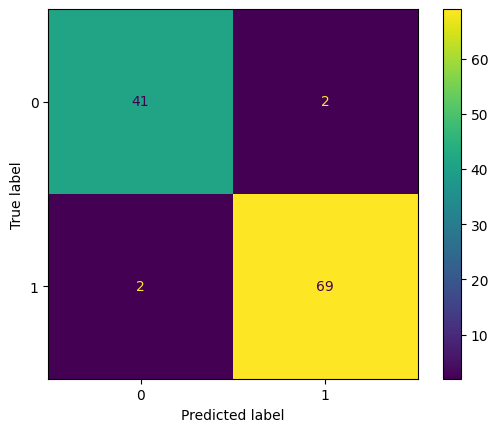

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

Como puede observarse, el clasificador predijo la clase 0 correctamente en 41 de los casos y solo se equivocó en 2 ocasiones. De igual manera, el clasificador predijo correctamente la clase 1 en 69 veces de los casos y solo se equivocó en 2 ocasiones.
En otras palabras, el clasificador predice correctamente el 94.34% de las veces cuando una persona tiene un tumor maligno (TN) y solo el 4.6% de las veces predice incorrectamente que un tumor maligno es benigno (FP). Si bien la precisión para clasificar tumores malignos, en el 4,6% de las veces los pacientes pensaran que su tumor es benigno cuando en ralidad es malo. Esto es delicado pues pone en peligro su vida ya que podrían no tomar tratamiento para el tumor y podría costarles la vida.

Asimismo, cuando el tumor es benigno el clasificador predice correctamente el 97,1% de las veces (TP). Solo el 2.8% de las veces predice falsos negativos (FN). Es decir, solo para el 2,8% de las personas que tengan un tumor benigno, el modelo incorrectamente clasificará el tumor como maligno. Esto es menos grave que en el caso de los falsos positivos, pues en este caso y dado que el tumor no es maligno, la persona no se encuentra en riesgo de morir a causa del tumor.  

  - Graficar la curva ROC.

  La Curva ROC permite analizar el rendimiento del modelo de clasificación. Permite analizar la relación entre los casos verdaderamente positivos (TP) y los casos negativos incorrectamente clasificados como positivos (FP). En este contexto, permite medir que tan confiable es el modelo en clasificar tumores malignos correctamente (TP) y qué tan impreciso es en clasificar como un tumor benigno, a una persona que en realidad tiene un tumor maligno (FP).

  La curva ROC muestra la tasa de falsos positivos y la tasa de verdaderos positivos. Es decir,

  $$TPR = \frac{TP}{TP + FN}$$

  $$FPR = \frac{FP}{FP + TN}$$

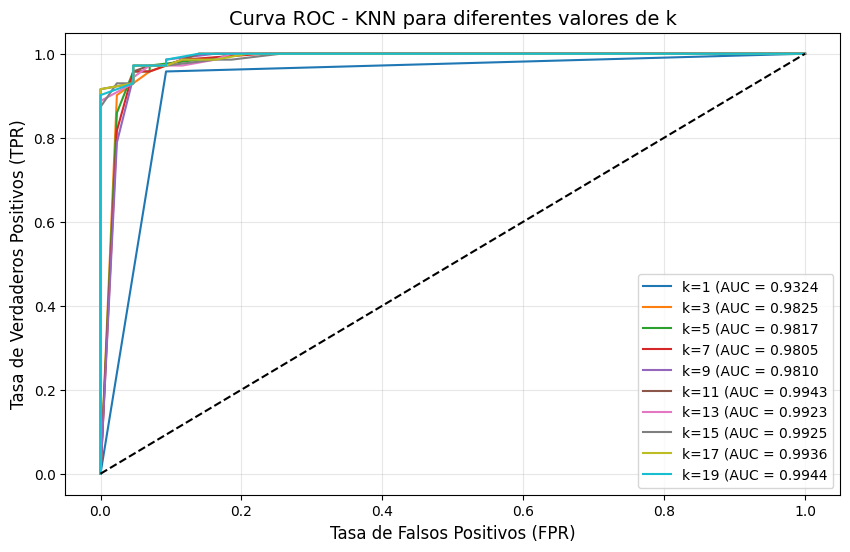

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# urva ROC para distintos valores de k (de 1 a 20)
for k in list(range(1,20,2)):
    knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
    knn_model.fit(X_train, y_train)
    y_probs = knn_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'k={k} (AUC = {auc:.4f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - KNN para diferentes valores de k', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

La gráfica anterior también muestra el valor del área bajo la curva ROC (AUC). El indicador AUC concentra la información de la curva ROC. Si AUC es cercana a 1, significa que el modelo clasifica correctamente casi el 100% de los casos. Si es cercano a 0.5, significa que el modelo clasifica de manera aleatoria (sería como lanzar una moneda justa donde la posibilidad de clasificar correctamente e incorrectamente es igual y es 50%). Si el valor de AUC es menos a 0,5 y cercano a 0, el modelo no es bueno prediciendo.  En nuestro caso, para casi todos los valores de k el AUC es superior al 0,9, lo que significa que el modelo es bueno clasificando los tumores correctamente. Es decir, comete pocos FP y FN.

  - Comentar los resultados y explicar qué valor de k parece óptimo.

Como puede observarse, si bien el AUC es mayor para k=19, este número de vecinos tiene un menor "Accuracy" que 9 vecinos. Es decir, el modelo con k=9 tiene una mayor capacidad de clasificación global. Además, como puede observarse de la matriz de confusión, la tasa de equivocación del modelo (FP o FN) es baja.
Dado que en este caso de trata detectar tumores cancerígenos, es importante clasificarlos correctamente y no pasar un tumor maligno por uno benigno. En otras palabras, clasificar falsos positivos puede costar vidas.
